In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('datasets/AcademicPerformance_New.csv')

In [4]:
df.head()


,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No


In [5]:
df.tail()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
94,95.0,USA,79.0,NaN,NaN,26.333333,A,No
95,96.0,Japan,78.0,81.0,82.0,80.333333,A,No
96,97.0,USA,65.0,66.0,62.0,64.333333,B,No
97,98.0,Rassia,63.0,72.0,70.0,68.333333,B,Yes
98,99.0,India,58.0,67.0,NaN,41.666667,B,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Roll No      98 non-null     float64
 1   NationalITy  98 non-null     object 
 2   WT           91 non-null     float64
 3   DSBDA        95 non-null     float64
 4   AI           89 non-null     float64
 5   Average      98 non-null     float64
 6   Grade        98 non-null     object 
 7   PG           98 non-null     object 
dtypes: float64(5), object(3)
memory usage: 6.3+ KB


In [7]:
df.isnull().sum()

Roll No         1
NationalITy     1
WT              8
DSBDA           4
AI             10
Average         1
Grade           1
PG              1
dtype: int64

In [8]:
df['WT'] = df['WT'].fillna(df['WT'].mean())
df['DSBDA'] = df['DSBDA'].fillna(df['DSBDA'].mean())
df['AI'] = df['AI'].fillna(df['DSBDA'].mean())

In [9]:
df.isnull().sum()

Roll No        1
NationalITy    1
WT             0
DSBDA          0
AI             0
Average        1
Grade          1
PG             1
dtype: int64

In [12]:
df = df.dropna(subset=['Roll No'])

In [14]:
df.isnull().sum()

Roll No        0
NationalITy    0
WT             0
DSBDA          0
AI             0
Average        0
Grade          0
PG             0
dtype: int64

In [17]:
df.duplicated().sum()

0

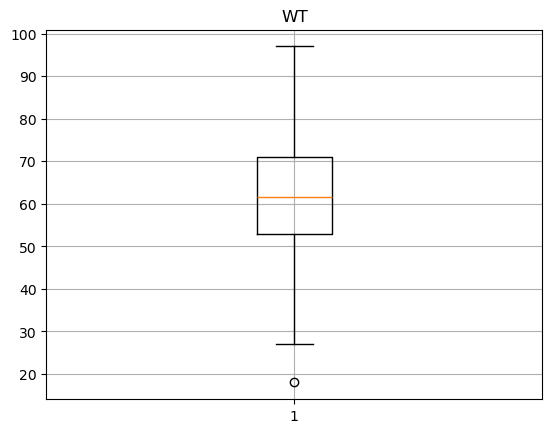

In [18]:
plt.boxplot(df['WT'])
plt.title('WT')
plt.grid(True)
plt.show()


In [19]:
df['WT_z'] = (df['WT'] - df['WT'].mean()) - df['WT'].std()

In [22]:
df = df[~((df['WT_z'] < -2.5) | (df['WT_z'] > 2.5))]

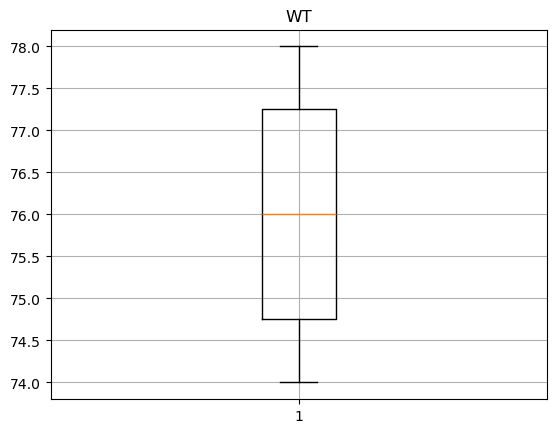

In [23]:
plt.boxplot(df['WT'])
plt.title('WT')
plt.grid(True)
plt.show()

In [25]:
outlier = ((df['WT_z'] < -2.5) | (df['WT_z'] > 2.5))


In [26]:
outlier.head()

4     False
13    False
24    False
36    False
38    False
Name: WT_z, dtype: bool

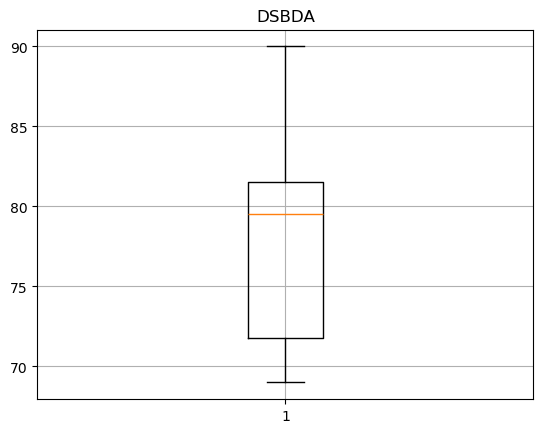

In [27]:
plt.boxplot(df['DSBDA'])
plt.title('DSBDA')
plt.grid(True)

In [28]:
df['DSBDA_z'] = (df['DSBDA']-df['DSBDA'].mean())/df['DSBDA'].std()

In [31]:
dsbda_outlier = (df['DSBDA_z'] < -2.5) | (df['DSBDA_z'] > 2.5)

In [32]:
dsbda_outlier.head()

4     False
13    False
24    False
36    False
38    False
Name: DSBDA_z, dtype: bool

In [33]:
df = df[~((df['DSBDA_z'] < -2.5) | (df['DSBDA_z'] > 2.5))]

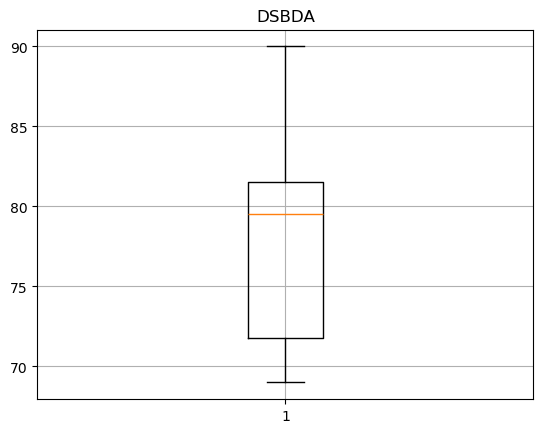

In [34]:

plt.boxplot(df['DSBDA'])
plt.title('DSBDA')
plt.grid(True)
plt.show()


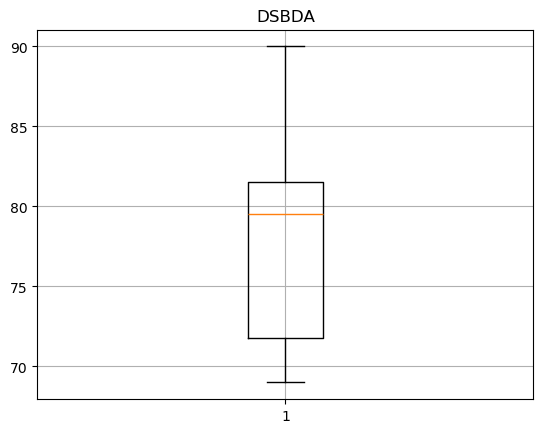

In [35]:

plt.boxplot(df['DSBDA'])
plt.title('DSBDA')
plt.grid(True)
plt.show()


In [36]:
df['AI_z'] = (df['AI']-df['AI'].mean())/df['AI'].std()


In [37]:
df = df[~((df['AI_z'] < -2.5) | (df['DSBDA_z'] > 2.5))]


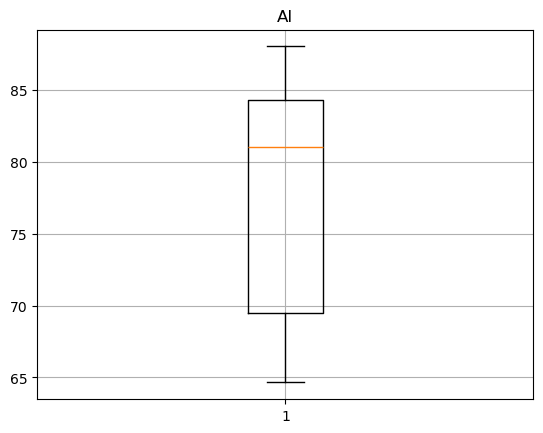

In [38]:
plt.boxplot(df['AI'])
plt.title('AI')
plt.grid(True)
plt.show()


In [39]:
df.drop(['WT_z','AI_z','DSBDA_z'], axis=1, inplace=True)

In [40]:
bins = [0,40,60,80,100]
labels = ['Low', 'Average', 'Good', 'Excellent']
df['performance'] = pd.cut(df['Average'],bins = bins, labels = labels)

In [41]:
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG,performance
4,5.0,India,76.0,78.0,64.652632,51.333333,C,No,Average
13,14.0,USA,78.0,72.0,70.000000,73.333333,C,No,Good
24,25.0,USA,74.0,71.0,80.000000,75.000000,C,Yes,Good
36,37.0,USA,74.0,81.0,83.000000,79.333333,C,Yes,Good
38,39.0,USA,75.0,90.0,88.000000,84.333333,B,Yes,Excellent


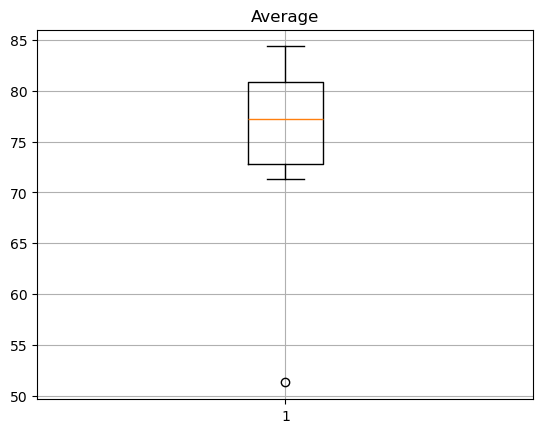

In [42]:

plt.boxplot(df['Average'])
plt.title('Average')
plt.grid(True)
plt.show()